<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Exploratory_Data_Analysis_(EDA)_on_Superstore_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [4]:
import pandas as pd

df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Check structure and nulls
df.info()

# Summary statistics
df.describe()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Check for duplicates
print("\nDuplicate rows:",df.duplicated().sum())


Duplicate rows: 0


In [7]:
#What are the total sales and total profit?
Total_sales=df['Sales'].sum()
Total_profit=df['Profit'].sum()

print(f"💰 Total Sales: ${Total_sales:,.2f}")
print(f"📈 Total Profit: ${Total_profit:,.2f}")

#🧪 :.2f Breakdown
#: → Introduces the format specification
#.2 → Round the number to 2 decimal places
#f → Format it as a floating-point number (i.e., decimal number)
#➕ , in :,.2f
#Adds commas for thousands separators (e.g., 1,000,000.00)

💰 Total Sales: $2,297,200.86
📈 Total Profit: $286,397.02


🏆 Top 5 States by Profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

🔻 Bottom 5 States by Profit:
 State
North Carolina    -7490.9122
Illinois         -12607.8870
Pennsylvania     -15559.9603
Ohio             -16971.3766
Texas            -25729.3563
Name: Profit, dtype: float64


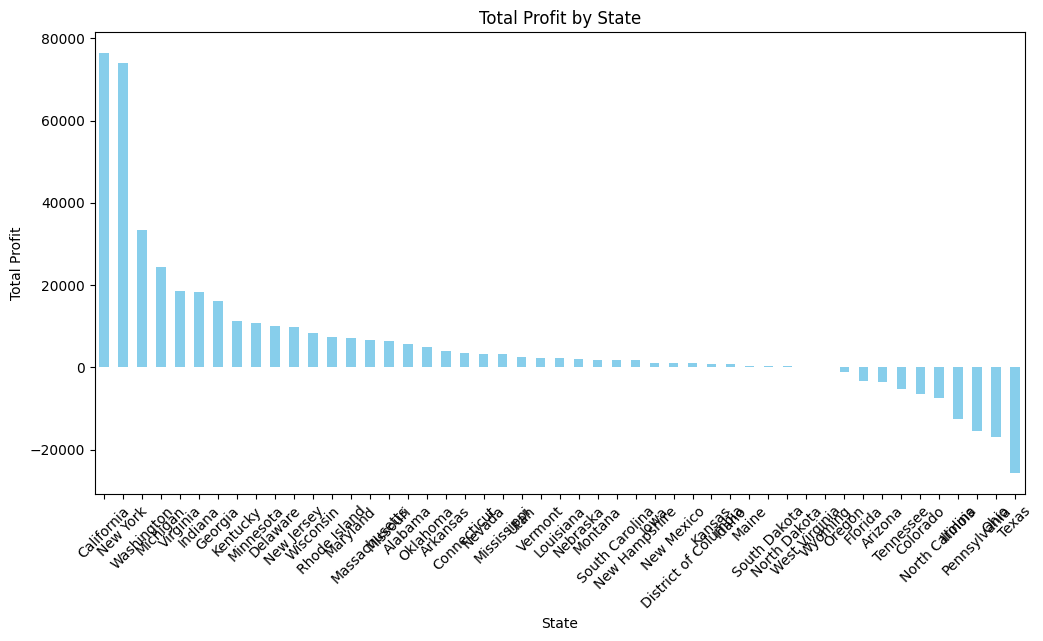

In [8]:
# Group by State and sum up the profit
state_profit=df.groupby('State')['Profit'].sum().sort_values(ascending=False)
state_profit.head()

# Display top 5 and bottom 5 states by profit
print("🏆 Top 5 States by Profit:\n", state_profit.head())
print("\n🔻 Bottom 5 States by Profit:\n", state_profit.tail())

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
state_profit.plot(kind='bar',color='skyblue')
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

📊 Performance by Category:
                        Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728

📊 Performance by Sub-Category:
                     Sales      Profit
Sub-Category                         
Copiers       149528.0300  55617.8249
Phones        330007.0540  44515.7306
Accessories   167380.3180  41936.6357
Paper          78479.2060  34053.5693
Binders       203412.7330  30221.7633
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Envelopes      16476.4020   6964.1767
Art            27118.7920   6527.7870
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811


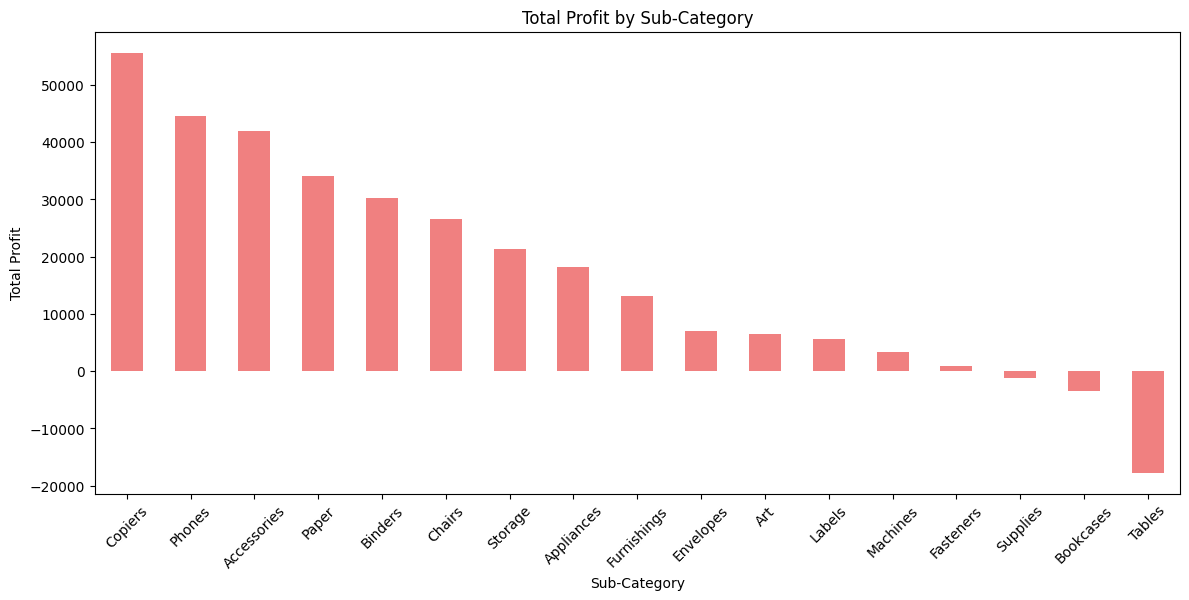

In [9]:
#Question 3: Which category and sub-category generate the most revenue and profit?
category_performance=df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
print("📊 Performance by Category:\n",category_performance)


Sub_Category_performance=df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
print("\n📊 Performance by Sub-Category:\n",Sub_Category_performance)

plt.figure(figsize=(14,6))
Sub_Category_performance['Profit'].plot(kind='bar',color='lightcoral')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

In [12]:
#💸 Question 4: Are there any products causing a loss?
loss_products = df[df['Profit'] < 0]
print(f"🔍 Number of Products Causing Loss: {loss_products.shape[0]}")

#Products with most loss
top_loss=loss_products.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(10)
print("\n🏆 Top 10 Products with the Most Loss:")
print(top_loss)

🔍 Number of Products Causing Loss: 1871

🏆 Top 10 Products with the Most Loss:
Product Name
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
GBC DocuBind P400 Electric Binding System                                     -6859.3896
Lexmark MX611dhe Monochrome Laser Printer                                     -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System                              -5098.5660
GBC DocuBind TL300 Electric Binding System                                    -4162.0336
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                      -3107.5272
Ibico EPK-21 Electric Binding System                                          -2929.4845
Bush Advantage Collection Racetrack Conference Table                          -2545.2600
Name: Profit, dtyp

<ipython-input-13-4185c0bdf64e>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


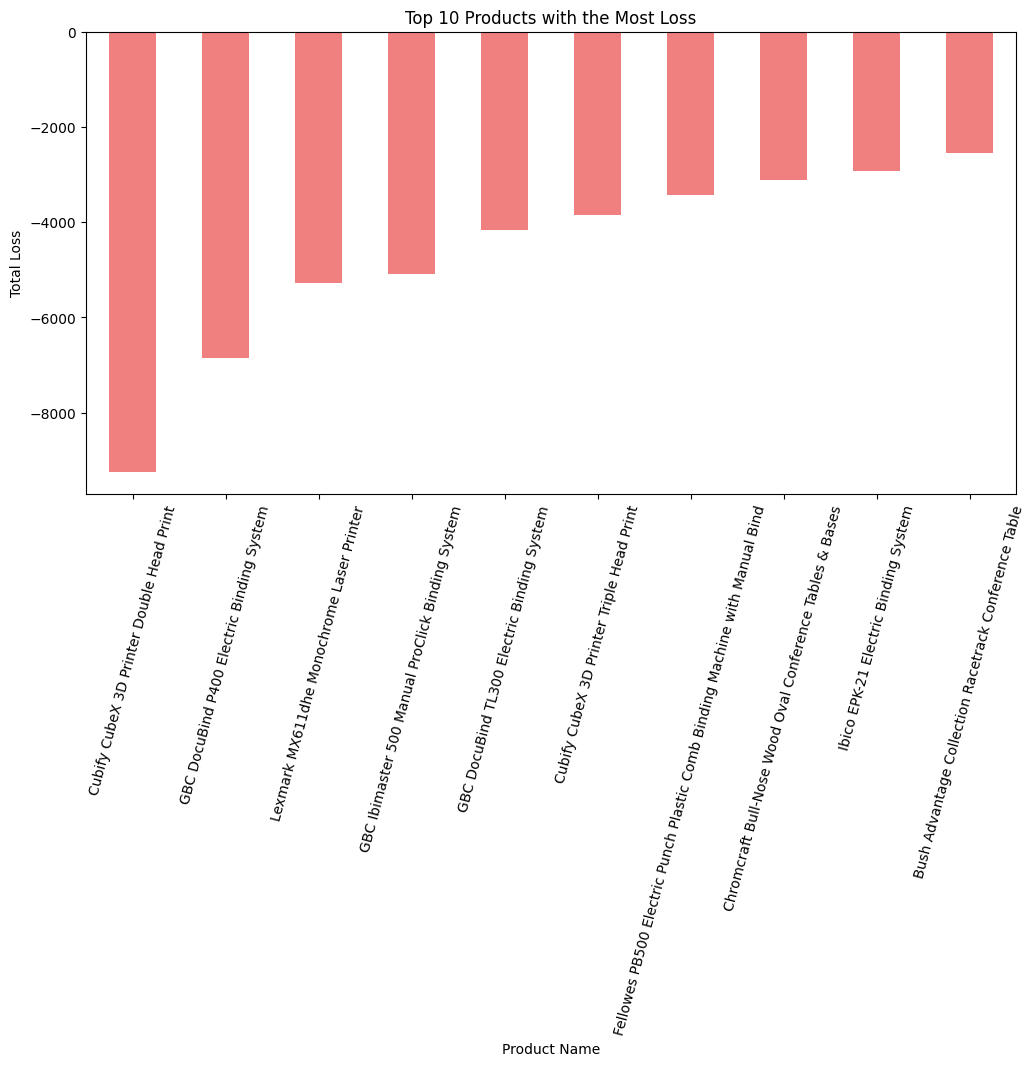

In [13]:
plt.figure(figsize=(12,6))
top_loss.plot(kind='bar',color='lightcoral')
plt.title('Top 10 Products with the Most Loss')
plt.xlabel('Product Name')
plt.ylabel('Total Loss')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [14]:
#What’s the Sales and Profit distribution across segments?
segment_perf=df.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
print("📊 Sales and Profit Distribution by Segment:\n",segment_perf)

📊 Sales and Profit Distribution by Segment:
                     Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


<Figure size 800x500 with 0 Axes>

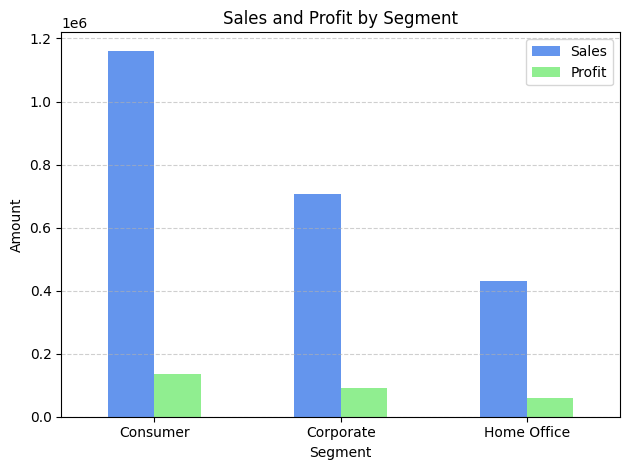

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
segment_perf.plot(kind='bar', color=['#6495ED', '#90EE90'])
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
#Which region is the most profitable?
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print("📍 Region-wise Performance:\n", region_perf)


📍 Region-wise Performance:
                Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
South    391721.9050   46749.4303
Central  501239.8908   39706.3625


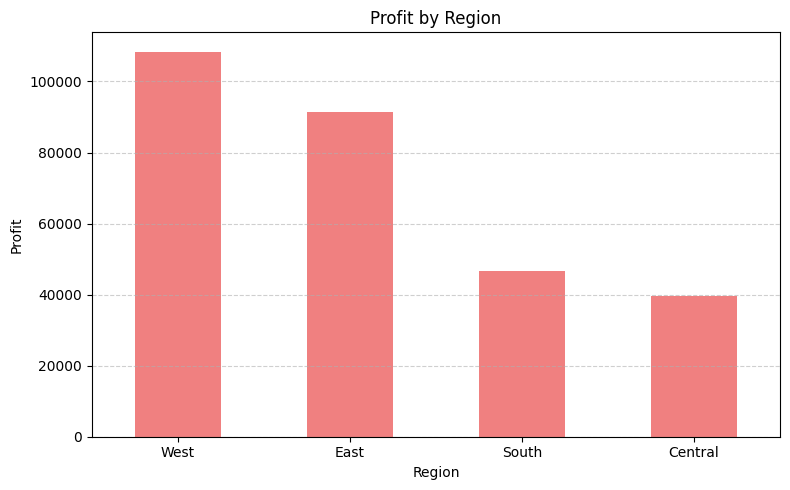

In [17]:
plt.figure(figsize=(8,5))
region_perf['Profit'].plot(kind='bar', color='lightcoral')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
